In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [90]:
nysdr=pd.read_csv('nysdr.csv')
nysdr=nysdr.drop('Unnamed: 0',axis=1)
nysdr['School']=nysdr['School'].apply(lambda x: " ".join(x.title() for x in x.split()))
nysdr["Sued"]=nysdr['Num_Payments']!=0

In [91]:
# Limiting to US Schools or not
nysdr_usa=nysdr.loc[nysdr.Country=="USA"]
nysdr_non_usa=nysdr.loc[nysdr.Country!="USA"]

## Plotting

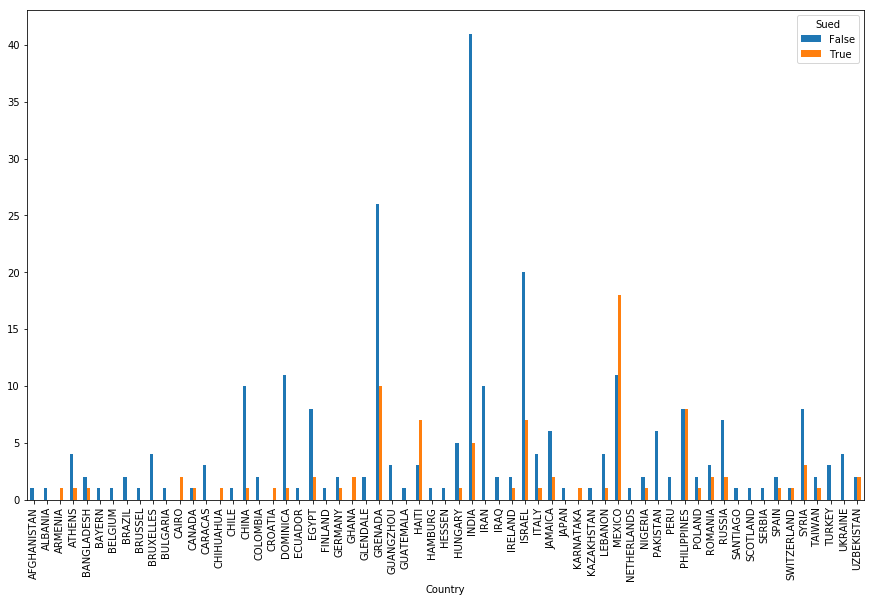

In [92]:
nysdr_non_usa.groupby('Country').Sued.value_counts().unstack().fillna(0).plot(kind='bar',figsize=(15,9)) #normalize=True

In [93]:
nys=nysdr.loc[nysdr.State=="NY"]
group=nys.groupby(["School"])
len(group.Num_Payments)
nys_bar=group.Sued.value_counts(normalize=True).unstack().fillna(0)

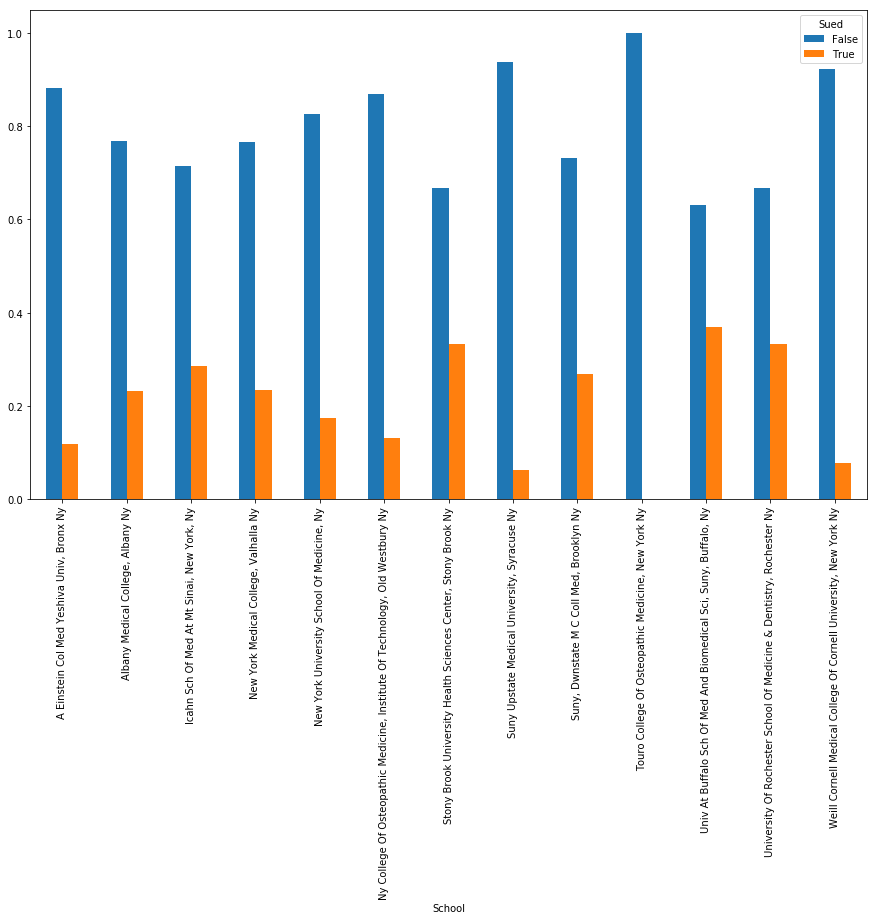

In [94]:
nys_bar.plot(kind='bar',figsize=(15,9))

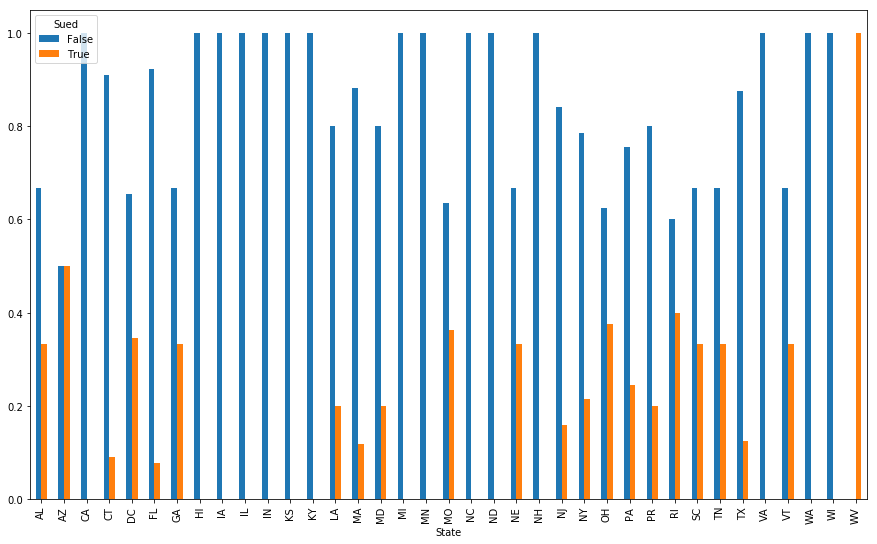

In [95]:
nysdr_usa.groupby('State').Sued.value_counts(normalize=True).unstack().fillna(0).plot(kind='bar',figsize=(15,9)) #normalize=True

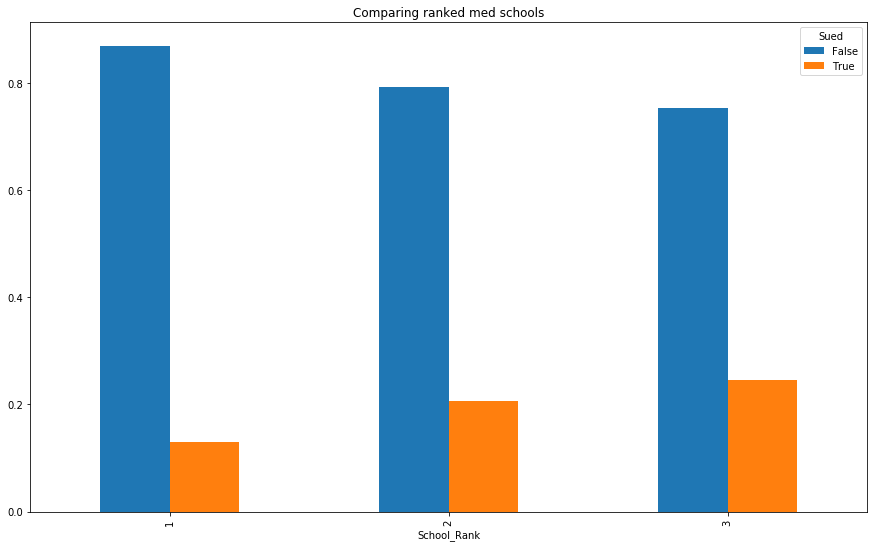

In [96]:
nysdr.groupby('School_Rank').Sued.value_counts(normalize=True).unstack().fillna(0).plot(kind='bar',
                                                                          figsize=(15,9),
                                                                         title='Comparing ranked med schools')
                                                                         #xticks=['Private/Elite','Public','Outside the US']) #normalize=True

In [97]:
from scipy import stats

In [98]:
private=nysdr_usa[nysdr_usa['School_Rank']==1]
public=nysdr_usa[nysdr_usa['School_Rank']==2]
print(len(private),len(public))

77 613


In [99]:
private["Num_Payments"].mean(axis=0)
public["Num_Payments"].mean(axis=0)
stats.ttest_ind(private["Num_Payments"],public["Num_Payments"])

Ttest_indResult(statistic=-1.4885146895844046, pvalue=0.13707341590394548)